<a id='p-desc'></a>
## Problem Description<br>

I analyse the UCI credit card default dataset available at: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#.

The dataset is details of credit card holders of an "important bank in Taiwan" for the period April to September, 2005. The features available include some basic customer demographics (gender, education, marital status and age), available credit line, their history of payment/default for the six months mentioned (Apr--Sep '05), their bill amounts and their payment amounts for that period and a binary target variable indicating default the following month.

The data was originally studied by the authors of the paper: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

I perform some EDA to understand the data and clean the data, engineer relevant features, build predictive models to predict default and perform some statistical analyses to obtain a greater understanding of the features and their interactions. I finish with some business case scenarios where the predictive model could be applied.

### Dataset

There are 25 variables in the dataset. They are:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of payment in April, 2005 (NT dollar)
* **default payment next month**: The target variable indicating default of payment (1=default, 0=non-default)

Some comments:

- It is not made clear as to exactly what the target indicates (default next month): it could be that the customer fails to make any payment, the customer fails to make the minimum payment or the customer fails to make the entire payment. Since there is no clarification possible, I will assume that default here indicates that the customer fails to make the minimum payment.

- The data description mentions bill statement amounts for a month and amount of payment in the same month. Usually, a bill statement for the month of May, 2005 is paid in June, 2005. I could make an informed guess by carefully looking at the amounts but I will assume that the payment in June 2005 is going towards the payment of the bill for June 2005.

- The credit limit of a person is said to include individual and family/supplemental credit. It is not clear if the bills are listed by individual or family as that could impact the data. Also, it is surprising that nobody's credit limit changed in the six month period considered but it could be a simplification introduced by the data set creator.

https://colab.research.google.com/drive/1Xe7avmz49IkkiZSx8LyY-BNPGaWI_1oE


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('../data/default of credit card clients.xls',header=1)


In [ ]:
df.to_csv('../data/credit_card_data.csv')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Missing value search
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
# converting PAY_0 to PAY_1, default payment next month to DEFAULT (making more sence here)
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DEFAULT'},inplace= True)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [8]:
df['ID'].value_counts()

ID
1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: count, Length: 30000, dtype: int64

In [9]:
# ID column of no use so can ne droped
df=df.drop('ID',axis=1)

In [10]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [11]:
# No of defaults
default = df.DEFAULT.sum()
non_default = len(df)-default
print(f"Total No of Default case:- {df.DEFAULT.sum()}")
print(f"Total No of Non-Default case:- {non_default}")



Total No of Default case:- 6636
Total No of Non-Default case:- 23364


In [12]:
default_per = default/len(df) * 100
non_default_per  = 100-default_per
print(f"% of default: {default_per}%")
print(f"% of Non-default: {non_default_per}%")


% of default: 22.12%
% of Non-default: 77.88%


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt



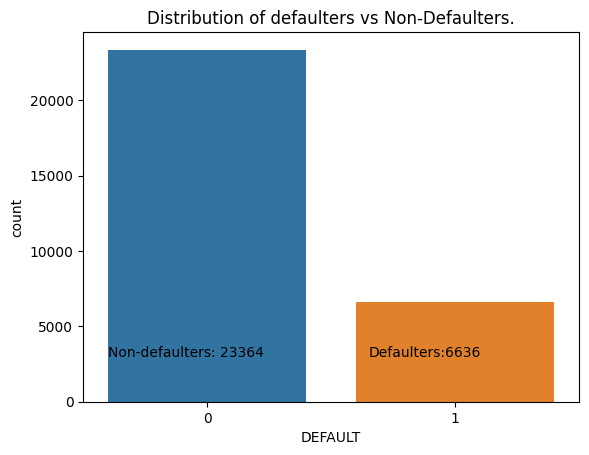

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="DEFAULT", data=df)
plt.annotate(
    "Non-defaulters: {}".format(non_default),
    xy=(-0.4, 15000),
    xytext=(-0.4, 3000),
    size=10
)

plt.annotate(
    f"Defaulters:{default}",
    xy = (0.65,20000),
    xytext=(0.65,3000),
    size = 10
)
plt.title("Distribution of defaulters vs Non-Defaulters.")
plt.show()


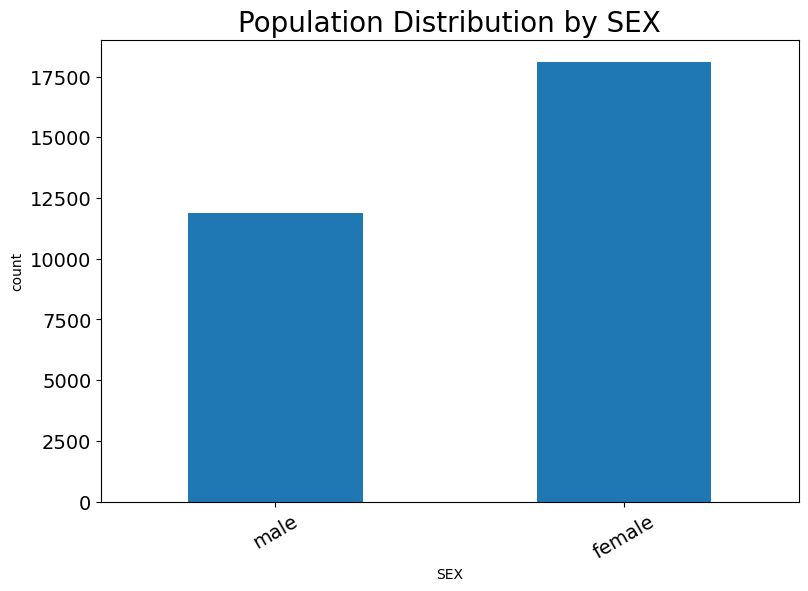

SEX       male  female    All
DEFAULT                      
0         9015   14349  23364
1         2873    3763   6636
All      11888   18112  30000


In [15]:
# Plot a bar graph showing population distribution by the feature values
col_name = 'SEX'
cross_tab = pd.crosstab(df["DEFAULT"], df[col_name], margins=True, normalize=False)

label = {1:'male',2:'female'}
cross_tab.rename(columns=label,inplace=True)

plt.figure(figsize=(9, 6))
i = cross_tab.shape[1] - 1
cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)

plt.title("Population Distribution by " + col_name, fontsize=20)
plt.ylabel("count")
plt.show()


print(cross_tab.style)
print(cross_tab)


## Adding new attributes to simplify the model input

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [17]:
df['AVG_PAY_DEFAULT']=df.iloc[:,5:11].sum(axis=1)/6
df['AVG_BILL_AMT']=df.iloc[:,11:17].sum(axis=1)/6
df['AVG_PAY_AMT']=df.iloc[:,17:23].sum(axis=1)/6


In [18]:
new_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'AVG_PAY_DEFAULT', 'AVG_BILL_AMT', 'AVG_PAY_AMT','DEFAULT']

In [19]:
new_df = df[new_cols]

In [20]:
new_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AVG_PAY_DEFAULT,AVG_BILL_AMT,AVG_PAY_AMT,DEFAULT
0,20000,2,2,1,24,-0.333333,1284.000000,114.833333,1
1,120000,2,2,2,26,0.500000,2846.166667,833.333333,1
2,90000,2,2,2,34,0.000000,16942.166667,1836.333333,0
3,50000,2,2,1,37,0.000000,38555.666667,1398.000000,0
4,50000,1,2,1,57,-0.333333,18223.166667,9841.500000,0
...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0.000000,120891.500000,7091.666667,0
29996,150000,1,3,2,43,-0.666667,3530.333333,2415.000000,0
29997,30000,1,2,2,37,1.333333,11749.333333,5216.666667,1
29998,80000,1,3,1,41,-0.166667,44435.166667,24530.166667,1


In [21]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [22]:

# Assuming you have your data properly loaded into `x` and `y` variables

# Check the dimensions of your data
print("x shape:", x.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




x shape: (30000, 8)
y shape: (30000,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the testing set
dt_predictions = dt_model.predict(X_test)

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing set
rf_predictions = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.7131666666666666
Random Forest Accuracy: 0.8006666666666666


In [44]:
import warnings
warnings.filterwarnings("ignore")

colm = [0,1,13,16,29997,29998,29999]

for i in colm:
    input_data = new_df.iloc[i,:-1]
    input_data_scaled = np.reshape(input_data, (1, -1))

    # Make the prediction using the scaled data
    prediction = rf_model.predict(input_data_scaled)
    pred=prediction[0]
    print(pred)
    

1
1
1
1
1
1
0


In [45]:
import warnings
warnings.filterwarnings("ignore")

colm = [0,1,13,16,29997,29998,29999]

for i in colm:
    input_data = new_df.iloc[i,:-1]
    input_data_scaled = np.reshape(input_data, (1, -1))

    # Make the prediction using the scaled data
    prediction = dt_model.predict(input_data_scaled)
    pred=prediction[0]
    print(pred)
    

1
1
1
1
1
1
0


# Hyperparameter tuning with scaling and using pipeline

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'Logistic Regression__C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'Decision Tree__max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'Random Forest__n_estimators': [100, 200, 300], 'Random Forest__max_depth': [5]})

}

best_model = None
best_accuracy = 0

# Iterate over the models and perform cross-validation with hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    # Create a pipeline with preprocessing steps and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy score
    best_estimator = grid_search.best_estimator_
    accuracy = grid_search.best_score_
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-Validation Accuracy:", accuracy)
    
    # Evaluate the best model on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if this model is the best so far
    if test_accuracy > best_accuracy:
        best_model = best_estimator
        best_accuracy = test_accuracy

# Use the best model for predictions
print("Best Model:", best_model)


Model: Logistic Regression
Best Parameters: {'Logistic Regression__C': 1}
Cross-Validation Accuracy: 0.7982083333333332
Test Accuracy: 0.7951666666666667

Model: Decision Tree
Best Parameters: {'Decision Tree__max_depth': 5}
Cross-Validation Accuracy: 0.8047500000000001
Test Accuracy: 0.8051666666666667

Model: Random Forest
Best Parameters: {'Random Forest__max_depth': 5, 'Random Forest__n_estimators': 100}
Cross-Validation Accuracy: 0.8004583333333335
Test Accuracy: 0.7993333333333333

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier(max_depth=5))])


In [25]:
# Check the dimensions of the split data
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (24000, 8)
x_test shape: (6000, 8)
y_train shape: (24000,)
y_test shape: (6000,)


In [32]:
new_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AVG_PAY_DEFAULT,AVG_BILL_AMT,AVG_PAY_AMT,DEFAULT
0,20000,2,2,1,24,-0.333333,1284.000000,114.833333,1
1,120000,2,2,2,26,0.500000,2846.166667,833.333333,1
2,90000,2,2,2,34,0.000000,16942.166667,1836.333333,0
3,50000,2,2,1,37,0.000000,38555.666667,1398.000000,0
4,50000,1,2,1,57,-0.333333,18223.166667,9841.500000,0
...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0.000000,120891.500000,7091.666667,0
29996,150000,1,3,2,43,-0.666667,3530.333333,2415.000000,0
29997,30000,1,2,2,37,1.333333,11749.333333,5216.666667,1
29998,80000,1,3,1,41,-0.166667,44435.166667,24530.166667,1


In [27]:
input_data = new_df.iloc[29998,:]
print(input_data)
input_data = new_df.iloc[29998,:-1]


LIMIT_BAL          80000.000000
SEX                    1.000000
EDUCATION              3.000000
MARRIAGE               1.000000
AGE                   41.000000
AVG_PAY_DEFAULT       -0.166667
AVG_BILL_AMT       44435.166667
AVG_PAY_AMT        24530.166667
DEFAULT                1.000000
Name: 29998, dtype: float64


In [42]:
import warnings
warnings.filterwarnings("ignore")

input_data_scaled = np.reshape(input_data, (1, -1))


# Make the prediction using the preprocessed data
prediction = best_model.predict(input_data_scaled)

# Retrieve the prediction value
prediction_value = prediction[0]

# Print the predicted value
print("Prediction:", prediction_value)


Prediction: 0


In [41]:
import warnings
warnings.filterwarnings("ignore")

colm = [0,1,13,16,29997,29998,29999,2,3,4]

for i in colm:
    input_data = new_df.iloc[i,:-1]
    input_data_scaled = np.reshape(input_data, (1, -1))

    # Make the prediction using the scaled data
    prediction = best_model.predict(input_data_scaled)
    pred=prediction[0]
    print(pred)
    

0
0
1
1
0
0
0
0
0
0
